In [3]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choices
from random import randint

In [4]:
def Dsq_init(df, k):
    centroid = data.sample()
    while centroid.shape[0] < k:
        min_dist = euclid_dist(df, centroid)
        prob = list()
        for i in range(df.shape[0]):
            prob.append((min_dist[i]**2)/np.sum(min_dist**2))
        #df["prob"] = prob
        id = choices(df.index.values.tolist(), prob)
        centroid = centroid.append(df.iloc[id, :])

    return centroid


In [5]:
def euclid_dist(df1, df2):
    dist_mat = np.zeros(shape=(df1.shape[0], df2.shape[0]))
    for id1, row1 in df1.iterrows():
        j = 0
        for id2, row2 in df2.iterrows():
            a = [row1["X"]-row2["X"], row1["Y"]-row2["Y"]]
            dist_mat[id1][j] = np.linalg.norm(a)
            j += 1
    min_dist = dist_mat.min(axis=1)
    return min_dist

In [6]:
def k_means_fit(X, centroids, n):
    # get a copy of the original data
    X_data = X

    diff = 1
    j = 0
    No_iter = 0

    while(diff != 0):

        # creating a copy of the original dataframe
        i = 1

        # iterate over each centroid point
        for index1, row_c in centroids.iterrows():
            ED = []

            # iterate over each data point
            for index2, row_d in X_data.iterrows():

                # calculate distance between current point and centroid
                d1 = (row_c["X"]-row_d["X"])**2
                d2 = (row_c["Y"]-row_d["Y"])**2
                d = np.sqrt(d1+d2)

                # append distance in a list 'ED'
                ED.append(d)

            # append distace for a centroid in original data frame
            X[i] = ED
            i = i+1

        C = []
        for index, row in X.iterrows():

            # get distance from centroid of current data point
            min_dist = row[1]
            pos = 1

            # loop to locate the closest centroid to current point
            for i in range(n):

                # if current distance is greater than that of other centroids
                if row[i+1] < min_dist:

                    # the smaller distanc becomes the minimum distance
                    min_dist = row[i+1]
                    pos = i+1
            C.append(pos)

        # assigning the closest cluster to each data point
        X["Cluster"] = C

        # grouping each cluster by their mean value to create new centroids
        centroids_new = X.groupby(["Cluster"]).mean()[["Y", "X"]]
        if j == 0:
            diff = 1
            j = j+1

        else:
            # check if there is a difference between old and new centroids
            diff = (centroids_new['Y'] - centroids['Y']).sum() + \
                (centroids_new['X'] - centroids['X']).sum()
            No_iter += 1
            # print(diff.sum())

        centroids = X.groupby(["Cluster"]).mean()[["Y", "X"]]

    return X, centroids, No_iter


In [7]:
def k_means(data, k):
    # k = int(input("No, of Clusters: "))
    centroids = data.sample(k)
    clustered, cent, No_iter1 = k_means_fit(data, centroids, k)
    cost = np.sum(euclid_dist(data, cent))

    return cost, No_iter1


In [8]:
def k_means_plot(data, k):
    # k = int(input("No, of Clusters: "))
    centroids = data.sample(k)
    clustered, cent, No_iter1 = k_means_fit(data, centroids, k)

    color = ['brown', 'blue', 'green', 'cyan', 'black', 'y']

    # plot data
    for k in range(len(color)):
        cluster = clustered[clustered["Cluster"] == k+1]
        plt.scatter(cluster["X"], cluster["Y"], c=color[k])

    # plot centroids
    plt.scatter(cent["X"], cent["Y"], c='red')
    plt.xlabel('X')
    plt.ylabel('Y')


In [9]:
def k_means_Dsq(data, k):
    #k = int(input("No, of Clusters: "))
    centroids = Dsq_init(data, k)
    clustered, cent, No_iter2 = k_means_fit(data, centroids, k)
    cost = np.sum(euclid_dist(data, cent))

    return cost, No_iter2


In [10]:
def k_means_Dsq_plot(data, k):
    #k = int(input("No, of Clusters: "))
    centroids = Dsq_init(data, k)
    clustered, cent, No_iter2 = k_means_fit(data, centroids, k)

    color = ['brown', 'blue', 'green', 'cyan', 'black', 'y']
    # plot data
    for k in range(len(color)):
        cluster = clustered[clustered["Cluster"] == k+1]
        plt.scatter(cluster["X"], cluster["Y"], c=color[k])

    # plot centroids
    plt.scatter(cent["X"], cent["Y"], c='red')
    plt.xlabel('X')
    plt.ylabel('Y')


In [26]:
mean = np.matrix([[10, 10], [-5, -7], [12, -2], [1, 9], [17, -0.5], [26, 18], [-15, 15], [0, -9], [0, -20], [22, -20]])
data = np.matrix([[0, 0]])
n = []
for i in range(mean.shape[0]):
    n.append(randint(100, 500))
    normal_2D = np.random.laplace(0, 3, (2,n[i]))
    fin = normal_2D.T + mean[i]
    data = np.vstack([data, fin])

print(data.shape)
print(n)

(3314, 2)
[250, 328, 131, 468, 341, 192, 474, 228, 492, 409]


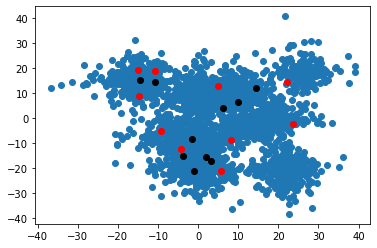

In [27]:
data = pd.DataFrame(data[1:, :], columns=['X', 'Y'])
centres = Dsq_init(data, 10)
rand_centres = data.sample(10)
plt.scatter(data['X'], data['Y'])
plt.scatter(centres['X'], centres['Y'], c='r')
plt.scatter(rand_centres['X'], rand_centres['Y'], c='black')


In [28]:
cost_kmeans = []
cost_Dsq = []
t1, t2 = [], []
Noiter_kmeans, Noiter_Dsq = [], []
k = 2
count = 0
while k < 19:
    print("#"*100)
    print("K = {}".format(k))
    for i in range(10):
        start_time = time.time()
        a, b = k_means(data, k)
        Noiter_kmeans.append(b)
        cost_kmeans.append(a)
        t1.append(time.time() - start_time)
        start_time2 = time.time()
        e, f = k_means_Dsq(data, k)
        Noiter_Dsq.append(f)
        cost_Dsq.append(e)
        t2.append(time.time() - start_time2)
        print(cost_kmeans[count*10+i], "\t", t1[count*10+i],
              "\t", cost_Dsq[count*10+i], "\t", t2[count*10+i])
        print("K means:{0}\t\tK means ++ : {1}".format(b, f))

    k += 4
    count += 1

####################################################################################################
K = 2
44319.28314607627 	 35.38844299316406 	 44312.71267606085 	 14.70433759689331
K means:34		K means ++ : 13
44319.28314607627 	 11.916151762008667 	 44312.71267606085 	 15.882797002792358
K means:12		K means ++ : 14
44319.28314607627 	 6.606400966644287 	 44319.28314607627 	 11.67122769355774
K means:6		K means ++ : 11
44319.28314607627 	 12.270831108093262 	 44319.28314607627 	 10.517966508865356
K means:12		K means ++ : 10
44319.28314607627 	 6.675865411758423 	 44312.71267606085 	 14.608988046646118
K means:6		K means ++ : 15
44312.71267606085 	 11.853606224060059 	 44319.28314607627 	 34.26970839500427
K means:13		K means ++ : 39
44319.28314607627 	 30.29027533531189 	 44312.71267606085 	 10.08854079246521
K means:34		K means ++ : 10
44319.28314607627 	 31.863935708999634 	 44312.71267606085 	 14.45273756980896
K means:33		K means ++ : 15
44312.71267606085 	 12.341732025146484 	

In [29]:
NoCluster = [2, 6, 10, 14, 18]
k_meansAvg, DsqAvg, k_meansMin, DsqMin, k_meansAvgI, DsqAvgI = [], [], [], [], [], []
k_meansAvgT, DsqAvgT = [], []
c = 0
k = 2
while k < 19:
    k_meansAvg.append(np.mean(cost_kmeans[c*10:(c+1)*10]))
    k_meansAvgT.append(np.mean(t1[c*10:(c+1)*10]))
    DsqAvg.append(np.mean(cost_Dsq[c*10:(c+1)*10]))
    DsqAvgT.append(np.mean(t2[c*10:(c+1)*10])) 
    k_meansAvgI.append(np.mean(Noiter_kmeans[c*10:(c+1)*10]))
    DsqAvgI.append(np.mean(Noiter_Dsq[c*10:(c+1)*10]))
    k_meansMin.append(np.min(cost_kmeans[c*10:(c+1)*10])) 
    DsqMin.append(np.min(cost_Dsq[c*10:(c+1)*10]))
    k += 4
    c += 1

In [30]:
Results = pd.DataFrame()
Results["Cluster No."] = NoCluster
Results["k_meansAvg"] = k_meansAvg
Results["k_means ++ Avg"] = DsqAvg
Results["k_means Min"] = k_meansMin
Results["k_means ++ Min"] = DsqMin
Results["k_meansAvgT"] = k_meansAvgT 
Results["k_means++AvgT"] = DsqAvgT
Results["k_meansAvgI"] = k_meansAvgI
Results["k_means++AvgI"] = DsqAvgI
Results

,Cluster No.,k_meansAvg,k_means ++ Avg,k_means Min,k_means ++ Min,k_meansAvgT,k_means++AvgT,k_meansAvgI,k_means++AvgI
0,2,44317.969052,44315.340864,44312.712676,44312.712676,17.175261,16.537187,17.3,16.8
1,6,20348.558655,20340.906790,19812.605284,19812.605284,58.331218,46.209127,19.8,11.0
2,10,14424.423567,14609.594670,14210.181358,14208.619272,97.577056,111.255468,28.9,26.3
3,14,13038.282263,13080.790366,12787.619824,12798.766516,132.775586,140.764840,40.9,37.3
4,18,11881.621853,11948.487778,11749.790834,11764.747813,152.883880,177.943580,38.8,35.5


In [32]:
opt_cen = pd.DataFrame(np.matrix([[10, 10], [-5, -7], [12, -2], [1, 9], [17, -0.5],[26, 18], [-15, 15], [0, -9], [0, -20], [22, -20]]),columns=['X', 'Y'])
optimum = euclid_dist(data, opt_cen)

In [33]:
opt_cost = np.sum(optimum)
opt_cost

14237.190853634589

In [34]:
cost_Dsq[20:30]

[15254.762126898459,
 14366.414779770428,
 14208.619272309888,
 14534.916208893494,
 14832.317029637627,
 14541.508661862284,
 14714.883230596908,
 14583.772799115004,
 14383.878004599828,
 14674.874588502658]

In [2]:
nv =cost_Dsq[20:30]-opt_cost
AvgDev = nv/10
AvgDev 